# Analise de dados Automação

Em uma indústria, sensores monitoram constantemente a temperatura dos motores elétricos que impulsionam a linha de produção. Esses motores são essenciais para o funcionamento eficiente dos equipamentos e devem operar dentro de parâmetros definidos (50°C a 120°C). A estabilidade térmica é crucial, pois variações na temperatura podem indicar problemas como sobrecarga, falhas no sistema de ventilação ou desgaste nos componentes internos.

No entanto, os dados capturados pelos sensores mostram flutuações inesperadas. Para investigar o problema, será feita uma análise visual das tendências de temperatura ao longo do tempo e a identificação de possíveis anomalias. Essas análises ajudarão a evitar falhas catastróficas, minimizar o tempo de inatividade e prolongar a vida útil dos motores.

* Sensor 1 monitora o motor 1.
* Sensor 2 monitora o motor 2.
* Sensor 3 monitora o motor 3.

In [37]:
# Caso necessario, descomente as linhas seguintes e faça a instalação das bibliotecas necessárias
# !pip install pandas
# !pip install matplotlib

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [39]:
# lendo os dados
data = pd.read_csv('data/temp_sensores.csv',index_col=False)
data.to_csv('data/temp_sensores.csv',index=False)
data.head()

,ID,Data,Hora,Temperatura (°C)
0,3,2024-01-01 08:00:00,8,82.483571
1,1,2024-01-01 09:00:00,9,79.308678
2,3,2024-01-01 10:00:00,10,83.238443
3,3,2024-01-01 11:00:00,11,87.615149
4,1,2024-01-01 12:00:00,12,185.000000


In [40]:
data['ID'].value_counts()

ID
3    107
1     99
2     94
Name: count, dtype: int64

Os dados coletados pelos sensores incluem leituras de temperatura registradas de três sensores com base no ID.

In [41]:
data['Temperatura (°C)'].describe()

count    300.000000
mean      80.964508
std       20.815744
min     -111.000000
25%       76.417806
50%       80.329521
75%       83.289739
max      190.000000
Name: Temperatura (°C), dtype: float64

Nessa visualização já identificamos 2 possíveis anomalias: valor máximo igual a 190 e mínimo igual a -111

In [42]:
data.query('`Temperatura (°C)` <0')

,ID,Data,Hora,Temperatura (°C)
266,3,2024-01-12 10:00:00,10,-111.0


In [43]:
data.query('`Temperatura (°C)`>120')

,ID,Data,Hora,Temperatura (°C)
4,1,2024-01-01 12:00:00,12,185.0
14,2,2024-01-01 22:00:00,22,165.0
32,2,2024-01-02 16:00:00,16,168.0
52,2,2024-01-03 12:00:00,12,175.0
127,1,2024-01-06 15:00:00,15,180.0
128,3,2024-01-06 16:00:00,16,170.0
152,3,2024-01-07 16:00:00,16,190.0
253,1,2024-01-11 21:00:00,21,155.0


# Histograma

Objetivo: Verificar a distribuição das temperaturas registradas e identificar padrões ou desvios.

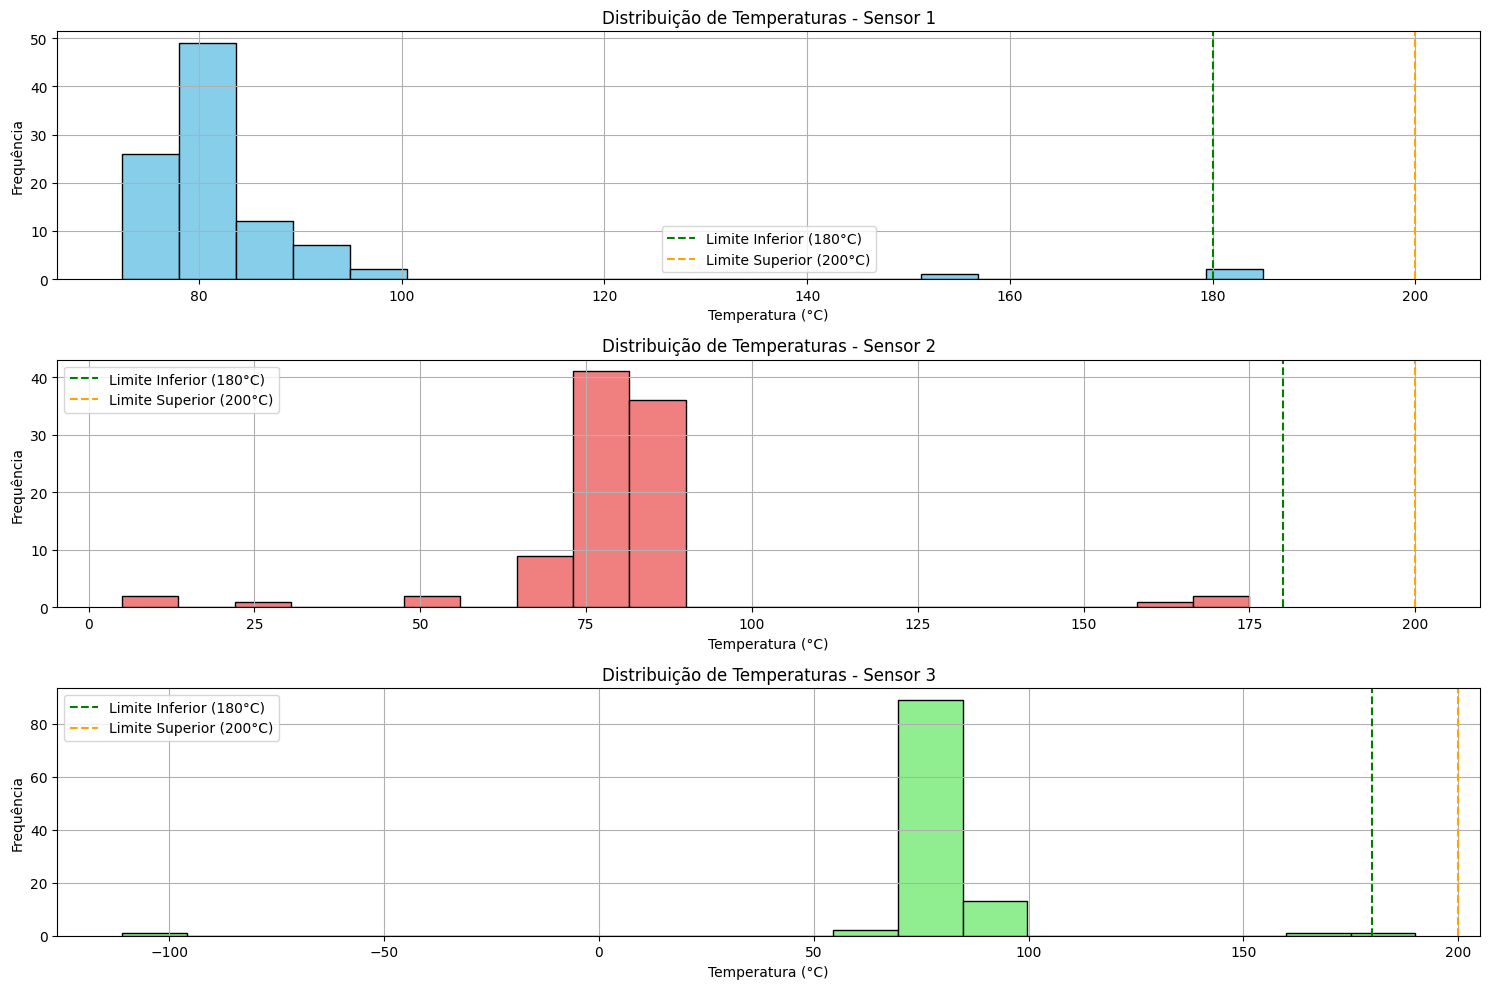

In [44]:
# Filtrar os dados para cada sensor
sensor_1_data = data[data["ID"] == 1]
sensor_2_data = data[data["ID"] == 2]
sensor_3_data = data[data["ID"] == 3]

# Plotar histogramas para cada sensor
plt.figure(figsize=(15, 10))

# Sensor 1
plt.subplot(3, 1, 1)
plt.hist(sensor_1_data["Temperatura (°C)"], bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=180, color='green', linestyle='--', label='Limite Inferior (180°C)')
plt.axvline(x=200, color='orange', linestyle='--', label='Limite Superior (200°C)')
plt.title('Distribuição de Temperaturas - Sensor 1')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.legend()
plt.grid()

# Sensor 2
plt.subplot(3, 1, 2)
plt.hist(sensor_2_data["Temperatura (°C)"], bins=20, color='lightcoral', edgecolor='black')
plt.axvline(x=180, color='green', linestyle='--', label='Limite Inferior (180°C)')
plt.axvline(x=200, color='orange', linestyle='--', label='Limite Superior (200°C)')
plt.title('Distribuição de Temperaturas - Sensor 2')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.legend()
plt.grid()

# Sensor 3
plt.subplot(3, 1, 3)
plt.hist(sensor_3_data["Temperatura (°C)"], bins=20, color='lightgreen', edgecolor='black')
plt.axvline(x=180, color='green', linestyle='--', label='Limite Inferior (180°C)')
plt.axvline(x=200, color='orange', linestyle='--', label='Limite Superior (200°C)')
plt.title('Distribuição de Temperaturas - Sensor 3')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Interpretação: Anomalias podem se manifestar como valores fora das frequências principais.

# Boxplot

Objetivo: Identificar visualmente outliers (temperaturas fora do intervalo interquartil).



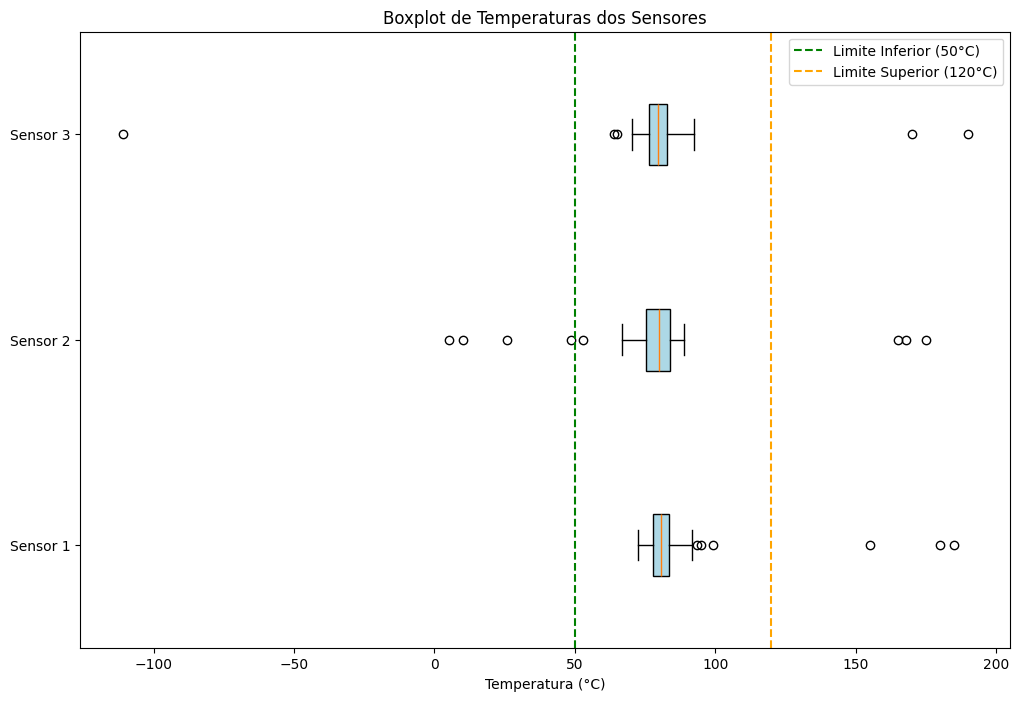

In [45]:
plt.figure(figsize=(12, 8))
plt.boxplot([sensor_1_data["Temperatura (°C)"], sensor_2_data["Temperatura (°C)"], sensor_3_data["Temperatura (°C)"]],
            vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightblue"),
            labels=['Sensor 1', 'Sensor 2', 'Sensor 3'])
plt.axvline(x=50, color='green', linestyle='--', label='Limite Inferior (50°C)')
plt.axvline(x=120, color='orange', linestyle='--', label='Limite Superior (120°C)')
plt.title('Boxplot de Temperaturas dos Sensores')
plt.xlabel('Temperatura (°C)')
plt.legend()
plt.show()

Interpretação: Valores acima ou abaixo dos limites do boxplot são potenciais anomalias.

# Média de temperatura por dia

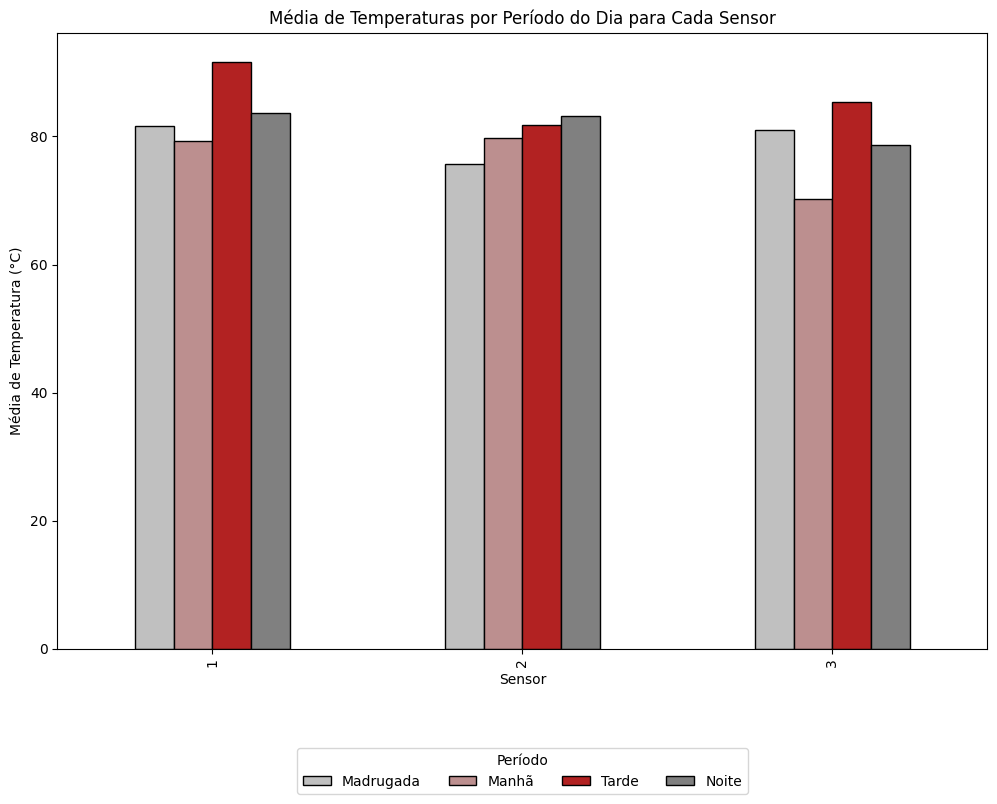

In [46]:
# Converter a coluna "Data" para o formato datetime
data["Data"] = pd.to_datetime(data["Data"])

# Separar a hora em uma nova coluna
data["Hora"] = data["Data"].dt.hour

# Classificar os períodos do dia
def classificar_periodo(hora):
    if 6 <= hora < 12:
        return "Manhã"
    elif 12 <= hora < 18:
        return "Tarde"
    elif 18 <= hora < 23:
        return "Noite"
    else:
        return "Madrugada"

data["Período"] = data["Hora"].apply(classificar_periodo)

# Calcular a média de temperatura por sensor e período
media_temperatura_periodo_sensor = data.groupby(["ID", "Período"])["Temperatura (°C)"].mean().unstack().reindex(columns=["Madrugada", "Manhã", "Tarde", "Noite"])

# Criar gráfico de média de temperatura por período para cada sensor
ax = media_temperatura_periodo_sensor.plot(kind='bar', figsize=(12, 8), color=['silver', 'rosybrown', 'firebrick', 'gray'], edgecolor='black')
plt.title("Média de Temperaturas por Período do Dia para Cada Sensor")
plt.xlabel("Sensor")
plt.ylabel("Média de Temperatura (°C)")
plt.legend(title="Período", bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)
plt.show()


# Analise para o sensor 2

In [47]:
sensor2 = data.query('ID == 2')

In [48]:
sensor2['Temperatura (°C)'].describe()

count     94.000000
mean      79.727874
std       21.041248
min        5.051165
25%       75.483017
50%       79.844150
75%       83.786051
max      175.000000
Name: Temperatura (°C), dtype: float64

# Identificação de Anomalias em todo o periodo coletado

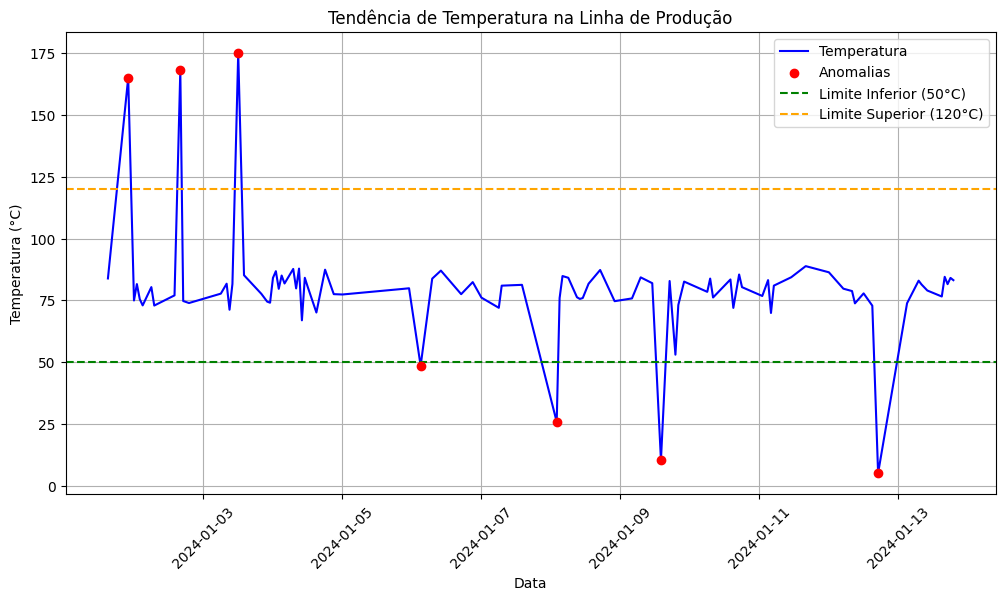

Anomalias detectadas:
     ID                Data  Hora  Temperatura (°C)    Período
14    2 2024-01-01 22:00:00    22        165.000000      Noite
32    2 2024-01-02 16:00:00    16        168.000000      Tarde
52    2 2024-01-03 12:00:00    12        175.000000      Tarde
115   2 2024-01-06 03:00:00     3         48.507737  Madrugada
162   2 2024-01-08 02:00:00     2         25.792978  Madrugada
198   2 2024-01-09 14:00:00    14         10.291044      Tarde
273   2 2024-01-12 17:00:00    17          5.051165      Tarde


In [49]:
# Identificação de Anomalias
anomalias = sensor2[(sensor2["Temperatura (°C)"] < 50) | (sensor2["Temperatura (°C)"] > 120)]

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(sensor2["Data"], sensor2["Temperatura (°C)"], label='Temperatura', color='blue')
plt.scatter(anomalias["Data"], anomalias["Temperatura (°C)"], color='red', label='Anomalias', zorder=5)
plt.axhline(y=50, color='green', linestyle='--', label='Limite Inferior (50°C)')
plt.axhline(y=120, color='orange', linestyle='--', label='Limite Superior (120°C)')
plt.title('Tendência de Temperatura na Linha de Produção')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotacionar as datas para melhor visualização
plt.show()

# Exibição dos dados de anomalias
print("Anomalias detectadas:")
print(anomalias)

O gráfico acima revela um comportamento anômalo do motor monitorado pelo sensor 2. Nas primeiras horas de operação, observamos um superaquecimento significativo. Após aproximadamente 100 horas de uso, as temperaturas registradas começaram a cair abaixo do intervalo ideal. Esses padrões podem indicar problemas como falhas no sistema de ventilação, sobrecarga ou desgaste dos componentes internos do motor.

# Identificação de Anomalias de um unico dia

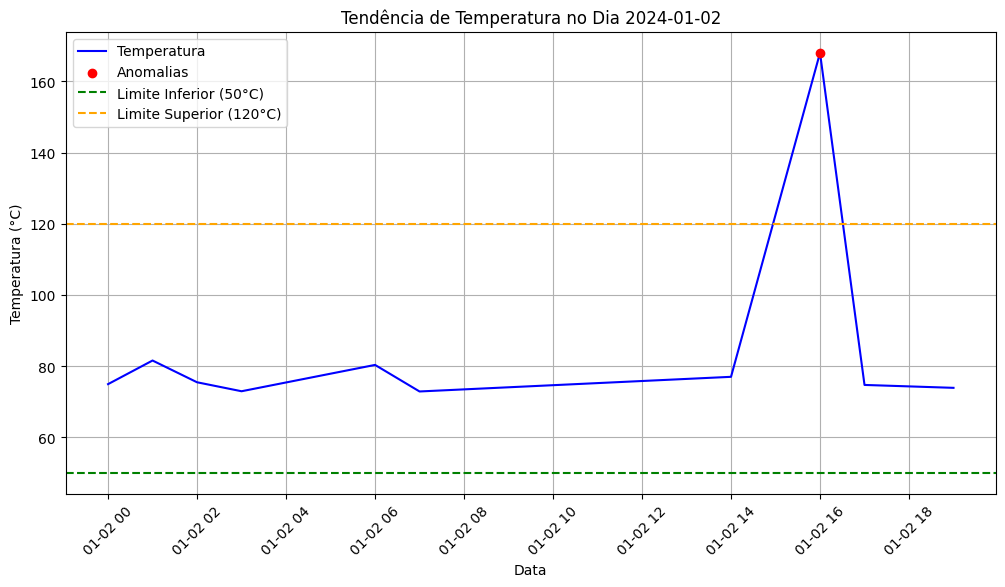

Anomalias detectadas no dia 2024-01-02:
    ID                Data  Hora  Temperatura (°C) Período
32   2 2024-01-02 16:00:00    16             168.0   Tarde


In [50]:
# Definir o dia específico para filtrar
dia_especifico = '2024-01-02'

# Converter a coluna "Data" para o formato datetime, se ainda não estiver
sensor2["Data"] = pd.to_datetime(sensor2["Data"])

# Filtrar os dados para o dia específico
data_dia_especifico = sensor2[sensor2['Data'].dt.date == pd.to_datetime(dia_especifico).date()]

# Identificação de Anomalias
anomalias_dia_especifico = data_dia_especifico[(data_dia_especifico["Temperatura (°C)"] < 50) | (data_dia_especifico["Temperatura (°C)"] > 120)]

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(data_dia_especifico["Data"], data_dia_especifico["Temperatura (°C)"], label='Temperatura', color='blue')
plt.scatter(anomalias_dia_especifico["Data"], anomalias_dia_especifico["Temperatura (°C)"], color='red', label='Anomalias', zorder=5)
plt.axhline(y=50, color='green', linestyle='--', label='Limite Inferior (50°C)')
plt.axhline(y=120, color='orange', linestyle='--', label='Limite Superior (120°C)')
plt.title(f'Tendência de Temperatura no Dia {dia_especifico}')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotacionar as datas para melhor visualização
plt.show()

# Exibição dos dados de anomalias
print(f"Anomalias detectadas no dia {dia_especifico}:")
print(anomalias_dia_especifico)


No gráfico acima, podemos observar que às 16 horas do dia 2 de janeiro de 2024, o sensor 2 registrou um superaquecimento significativo, atingindo uma temperatura de 168°C. Esse valor está bem acima do limite superior de 120°C, indicando uma anomalia crítica que precisa ser investigada para evitar possíveis falhas no motor.